# Анализ оттока клиентов банка

В данном проекте необходимо проанализировать клиентов регионального банка "*Метанпром*" и сделать сегментацию пользователей
по количеству потребляемых продуктов, исходя из оттока.

Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

**Цели проекта**

Сегментировать пользователей для определения факторов, влияющих на их отток.

*Входные данные* - `датасет с данными о клиентах банка`

*Заказчик* - `отдел маркетинга`

**План работы**

1. `Выдвинуть гипотезы`
 - Молодые клиенты чаще подвержены оттоку
 - Чем больше продуктов банка использует клиент, тем меньше шанс того, что он перестанет пользоваться услугами банка
 - С уменьшением баллов кредитного скоринга увеличивается отток клиентов


2. `Выгрузить данные и посмотреть общую информацию`


3. `Провести предобработку`
 - Исследовать соответствие типов данных
 - Проверить корректность наименования колонок
 - Исследовать пропущенные значения
 - Исследовать и удалить по необходимости дубликаты
 - Заменить/удалить пропущенные значения
 - Добавить вспомогательные поля


4. `Исследовательский анализ данных`
 - Проверить корреляцию по всем признакам
 - Анализ оттока по определённым параметрам


5. `Сегментировать клиентов`
 - Определить условия и доли для сегментирования
 - Описать выделенные сегменты
 - Посмотеть распределения по сегментам
 - Мини-вывод с рекомендациями по каждой группе


6. `Проверить статистические гипотезы`
 - Формулировка гипотез
 - Выбор и обноснование метода
 - Интерпретация результатов
   

7. `Написать общий вывод`


8. `Сделать презентацию с основными результатами исследования`

## Выгрузка данных

In [ ]:
# импортируем необходимые библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind, shapiro

from scipy import stats as st
from itertools import combinations

In [ ]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

data.head(20)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


In [ ]:
# выводим общую информацию

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [ ]:
# проверяем распределение всех показателей на наличие аномалий

data.describe()

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


**Вывод**

- В данных 10 000 строк и 12 колонок
- Некоторые столбцы некорректно написаны
- Есть неверные типы данных
- Присутствуют пропуски в столбцах "возраст" и "баланс"

## Предобработка данных

In [ ]:
# приводим все столбцы к нижнему регистру и изменяем столбец в соответствии со змеиным регистром

data.columns = data.columns.str.lower()

data = data.rename(columns={
    'userid': 'user_id'
})

data.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

In [ ]:
# изменяем тип данных

data['age'] = data['age'].astype('Int64')


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   Int64  
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: Int64(1), float64(3), int64(6), object(2)
memory usage: 947.4+ KB


In [ ]:
print(data['city'].unique())
print(data['gender'].unique())

['Рыбинск' 'Ярославль' 'Ростов']
['Ж' 'М']


In [ ]:
# добавляем новые столбцы для анализа корреляции пропущенных значений

def nan_col(data):
    data['age_nan'] = data['age'].apply(lambda x: 1 if pd.isnull(x) else 0)
    data['balance_nan'] = data['balance'].apply(lambda x: 1 if pd.isnull(x) else 0)
    return data

data = nan_col(data)

print(data['age_nan'].sum() == data['age'].isna().sum())
print(data['balance_nan'].sum() == data['balance'].isna().sum())

True
True


In [ ]:
data.duplicated().sum()

0

In [ ]:
# проверяем дубликаты среди id пользователей

data['user_id'].duplicated().sum()

73

In [ ]:
# сохраняем дубликаты id в отдельный список

list_id = list(data[data['user_id'].duplicated() == True]['user_id'])

In [ ]:
# выводим данные с дубирующимися id для проверки гипотезы о том, что дубликаты связаны с разными базами данных городов
# в каждом городе id пользователей указывают независимо от других городов

pd.set_option('display.max_rows', None)

data.query('user_id == @list_id').sort_values(by='user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,age_nan,balance_nan
1893,116540,883.0,Рыбинск,Ж,55,1,362756.49,3,0,1,175920.48,1,0,0
7694,116540,887.0,Ярославль,Ж,38,0,NaN,1,0,1,119247.61,0,0,1
7542,117943,880.0,Ярославль,Ж,40,0,NaN,1,1,0,137718.93,0,0,1
4866,117943,855.0,Рыбинск,Ж,32,6,1036832.93,4,1,1,107792.71,1,0,0
5896,120258,905.0,Ярославль,М,30,0,NaN,1,1,1,146427.96,0,0,1
5863,120258,908.0,Рыбинск,Ж,38,4,2213581.63,2,0,1,160327.77,1,0,0
1411,123461,829.0,Ярославль,Ж,59,0,96222.44,2,0,1,102771.55,1,0,0
8638,123461,934.0,Рыбинск,М,34,0,NaN,2,1,0,291619.27,0,0,1
8164,124450,859.0,Ярославль,Ж,38,6,516811.20,1,1,1,95144.63,1,0,0
9775,124450,758.0,Рыбинск,Ж,36,0,73574.07,2,0,1,79963.59,0,0,0


In [ ]:
# добавляем столбцы для дальнейшего анализа

def gender(x):
    if x == 'М':
        return 1
    else:
        return 0

data['gender_class'] = data['gender'].apply(gender)

data_copy = data.copy()

data = pd.get_dummies(data, columns=['city'], drop_first=False)
data['city'] = data_copy['city']

data.head()

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,age_nan,balance_nan,gender_class,city_Ростов,city_Рыбинск,city_Ярославль,city
0,183012,850.0,Ж,25,1,59214.82,2,0,1,75719.14,1,0,0,0,0,1,0,Рыбинск
1,146556,861.0,Ж,37,5,850594.33,3,1,0,86621.77,0,0,0,0,0,1,0,Рыбинск
2,120722,892.0,Ж,30,0,NaN,1,1,1,107683.34,0,0,1,0,0,1,0,Рыбинск
3,225363,866.0,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,0,0,0,0,1,Ярославль
4,157978,730.0,М,34,5,174.00,1,1,0,67353.16,1,0,0,1,0,0,1,Ярославль


In [ ]:
data.drop(['age', 'balance'], axis=1).corr()

,user_id,score,equity,products,credit_card,last_activity,est_salary,churn,age_nan,balance_nan,gender_class,city_Ростов,city_Рыбинск,city_Ярославль
user_id,1.000000,0.009804,0.004599,-0.004504,0.005674,-0.031029,-0.000369,-0.011928,0.034571,0.004125,0.030666,-0.033657,0.014615,0.010675
score,0.009804,1.000000,0.064126,-0.004115,-0.094732,-0.031179,0.163866,0.105962,0.005035,0.138871,0.012253,-0.037637,-0.000323,0.026967
equity,0.004599,0.064126,1.000000,0.432069,-0.167506,-0.001970,-0.171974,0.270559,-0.032040,-0.709951,-0.021622,0.036292,-0.005619,-0.020655
products,-0.004504,-0.004115,0.432069,1.000000,-0.251390,0.037141,-0.118054,0.300964,-0.033751,-0.487512,-0.022672,-0.006125,-0.042630,0.042782
credit_card,0.005674,-0.094732,-0.167506,-0.251390,1.000000,-0.033445,0.035556,-0.130790,0.009726,0.158334,0.126350,-0.098463,-0.050109,0.114971
last_activity,-0.031029,-0.031179,-0.001970,0.037141,-0.033445,1.000000,0.003039,0.168767,0.025120,0.028362,-0.013662,0.007005,0.048811,-0.048979
est_salary,-0.000369,0.163866,-0.171974,-0.118054,0.035556,0.003039,1.000000,0.001273,0.011252,0.307154,0.082376,-0.106060,-0.057435,0.126962
churn,-0.011928,0.105962,0.270559,0.300964,-0.130790,0.168767,0.001273,1.000000,-0.018994,-0.249421,0.141036,0.006024,-0.031244,0.023905
age_nan,0.034571,0.005035,-0.032040,-0.033751,0.009726,0.025120,0.011252,-0.018994,1.000000,0.046852,0.003876,-0.015114,0.022098,-0.009214
balance_nan,0.004125,0.138871,-0.709951,-0.487512,0.158334,0.028362,0.307154,-0.249421,0.046852,1.000000,0.063424,-0.061508,-0.013668,0.055919


In [ ]:
data = data.dropna(subset=['age'])
data = data.drop('age_nan', axis=1)

In [ ]:
data['products'].value_counts()

2    5119
1    3323
3    1038
4     474
5      19
0       1
Name: products, dtype: int64

In [ ]:
data.query('products == 0')

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_nan,gender_class,city_Ростов,city_Рыбинск,city_Ярославль,city
8957,147837,962.0,Ж,79,3,NaN,0,0,0,25063.96,1,1,0,0,1,0,Рыбинск


In [ ]:
# удаляем аномальную строку

data = data.query('products != 0')

data.query('products == 0')

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_nan,gender_class,city_Ростов,city_Рыбинск,city_Ярославль,city


**Вывод**

- Привели столбцы к правильному виду
- Изменили тип данных в столбце
- Явных дубликатов нет. Неявные присутствуют в столбце user_id, но они связаны с раздельным ведением баз данных, потому что в рахных городах могут повторяться айдишники
- Добавили вспомогательные столбцы для анализа
- Пропуски в столбце с возрастом могут быть технической ошибкой или эта информация не заполняется для некоторых продуктов. Их удалили, потому что их было меньше 1%
- Пропуски в колонке с балансом клиента коррелируют с некоторыми столбцами от умеренного уровня до сильного с баллами собсвенности. С уменьшением баллов собственности увеличивается шанс, что значение в колонке баланса будет пропущено
- Удалили аномальную строку с клиентом, у которого нет банковских продуктов

## Анализ данных

### Распределение численных показателей

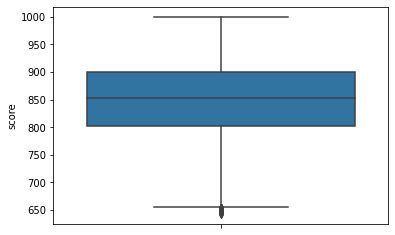

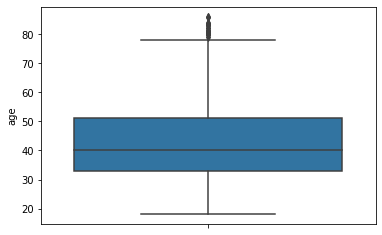

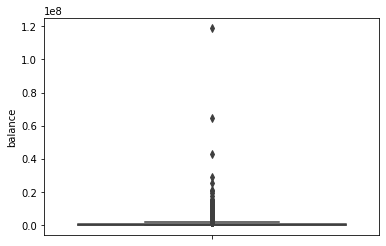

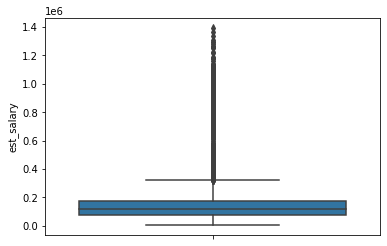

In [ ]:
for i in ['score', 'age', 'balance', 'est_salary']:
    sns.boxplot(data=data, y=i)
    plt.show()

**Вывод**

- Больше половины клиентов имеют достаточно высокий кредитный рейтинг
- Основной диапазон возраста клиентов - 35-50 лет
- В столбцах с балансом и приблизительной зп есть большое количество выбросов

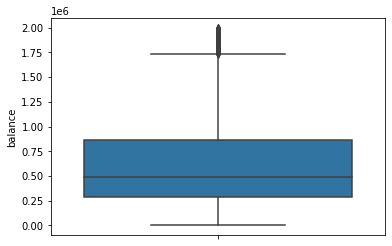

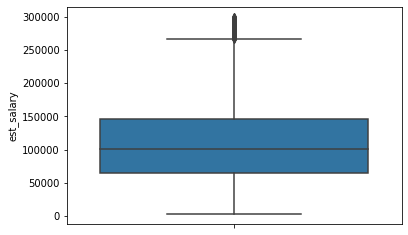

In [ ]:
for i in ['balance', 'est_salary']:
    sns.boxplot(data=data[(data['balance'] <= 2000000) & (data['est_salary'] <=300000)], y=i)
    plt.show()

**Вывод**

Медианный баланс на картах клиентов составляет 500 000 и зарплата - 100 000.

### Отток клиентов по продуктам

city,Ростов,Рыбинск,Ярославль
products,,,
1,0.110360,0.065344,0.064293
2,0.188820,0.179487,0.198257
3,0.284211,0.212121,0.302057
4,0.544118,0.646465,0.648208


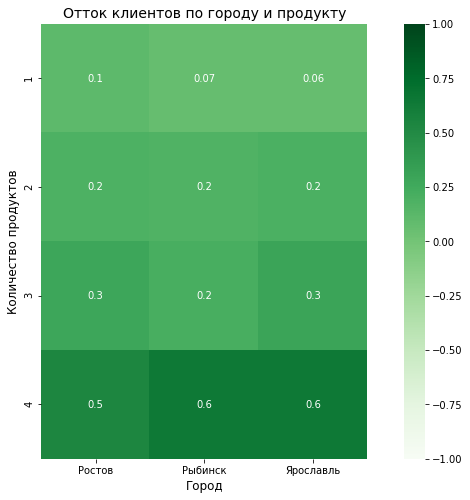

In [ ]:
# проверяем отток по количеству продуктов (кроме 5, потому что они исказят результат) и городу

ratio = data.query('products < 5').pivot_table(index='products', columns='city', values='churn', aggfunc='mean')
display(ratio)
plt.figure(figsize=(13, 8))

sns.heatmap(ratio, annot=True, vmin=-1, vmax=1, center= 0, fmt='.1g', square=True, cmap='Greens')

plt.title('Отток клиентов по городу и продукту', size=14)
plt.xlabel('Город', size=12)
plt.ylabel('Количество продуктов', size=12)

plt.show()

gender,Ж,М
products,,
1,0.041912,0.095212
2,0.127803,0.260336
3,0.213198,0.382550
4,0.558659,0.677966


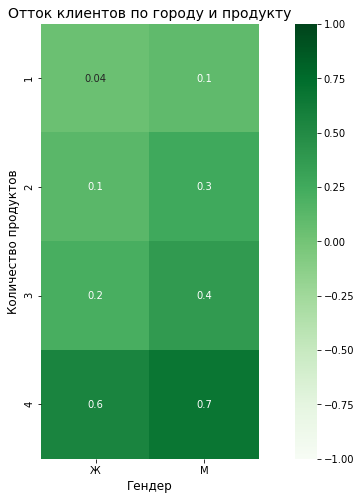

In [ ]:
ratio = data.query('products < 5').pivot_table(index='products', columns='gender', values='churn', aggfunc='mean')
display(ratio)
plt.figure(figsize=(13, 8))

sns.heatmap(ratio, annot=True, vmin=-1, vmax=1, center= 0, fmt='.1g', square=True, cmap='Greens')

plt.title('Отток клиентов по городу и продукту', size=14)
plt.xlabel('Гендер', size=12)
plt.ylabel('Количество продуктов', size=12)

plt.show()

equity,0,1,2,3,4,5,6,7,8,9
products,,,,,,,,,,
1,0.018377,0.070588,0.146597,0.145833,0.149502,0.183746,0.296296,0.312500,0.000000,1.0
2,0.069470,0.122685,0.131171,0.186735,0.226714,0.261054,0.275000,0.447368,0.272727,0.5
3,0.155172,0.211268,0.205128,0.236181,0.295620,0.375000,0.400000,0.400000,0.500000,0.5
4,0.583333,0.538462,0.656250,0.685714,0.604651,0.633136,0.620690,0.687500,1.000000,0.5


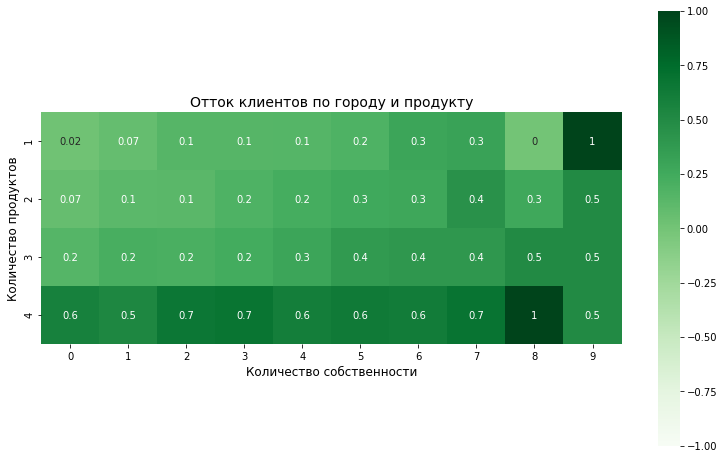

In [ ]:
ratio = data.query('products < 5').pivot_table(index='products', columns='equity', values='churn', aggfunc='mean')
display(ratio)
plt.figure(figsize=(13, 8))

sns.heatmap(ratio, annot=True, vmin=-1, vmax=1, center= 0, fmt='.1g', square=True, cmap='Greens')

plt.title('Отток клиентов по городу и продукту', size=14)
plt.xlabel('Количество собственности', size=12)
plt.ylabel('Количество продуктов', size=12)

plt.show()

**Вывод**

- Наибольший отток происходит у клиентов с 4-я продуктами, проживающими в Ярославле или Рыбинске
- По гендерному признаку отток происходит чуть больше у мужчин, особенно с 4-я продуктами
- Отток между параметрами продуктов и собственности наибольший в связке 4-2, 4-3 и 4-7 (продукт - собственность). Есть случаи, когда отток = 1, в связках 4-8 и 1-9, но это скорее всего связано с единичными случаями

### Доля оттока клиентов по признакам

In [ ]:
# классификая возрастов для упрощения работы с данными

def age(x):
    if 18 <= x <= 34:
        return 'Молодые'
    elif 35 <= x <= 50:
        return 'Взрослые'
    else:
        return 'Пожилые'

data['age_class'] = data['age'].apply(age)

,param,no_churn,churn,count,%_of_churn
0,Ж,4347,635,4982,0.127
1,М,3808,1183,4991,0.237


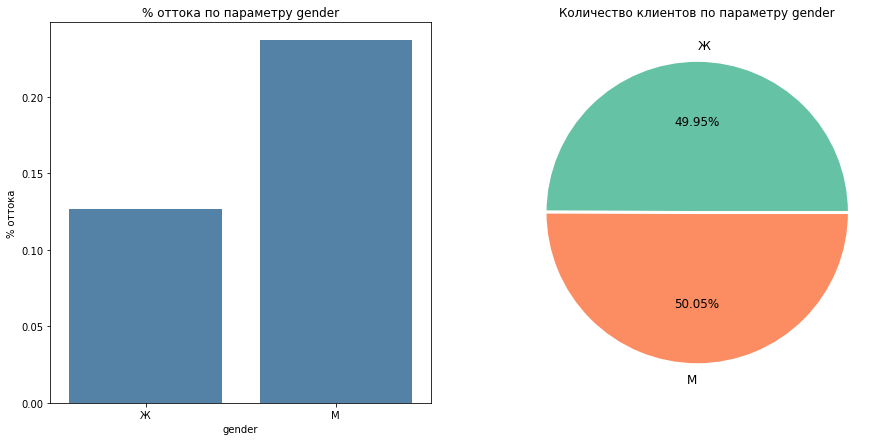

,param,no_churn,churn,count,%_of_churn
0,Взрослые,3762,698,4460,0.157
1,Молодые,2281,622,2903,0.214
2,Пожилые,2112,498,2610,0.191


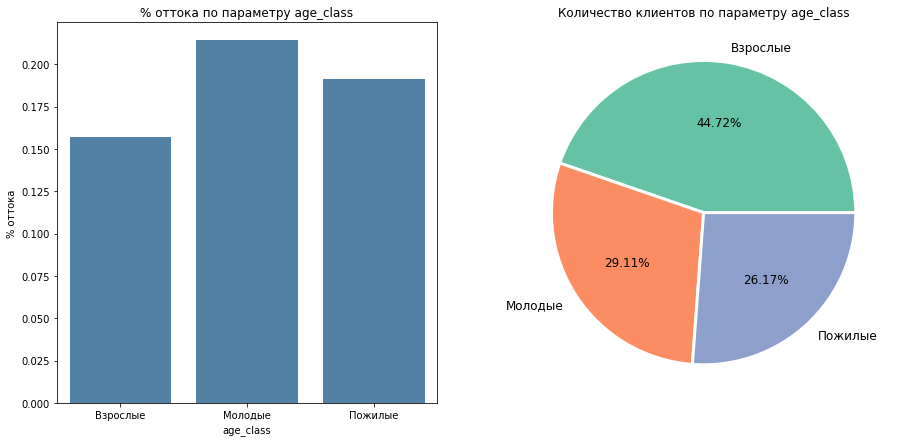

,param,no_churn,churn,count,%_of_churn
0,Ростов,1151,265,1416,0.187
1,Рыбинск,2246,436,2682,0.163
2,Ярославль,4758,1117,5875,0.190


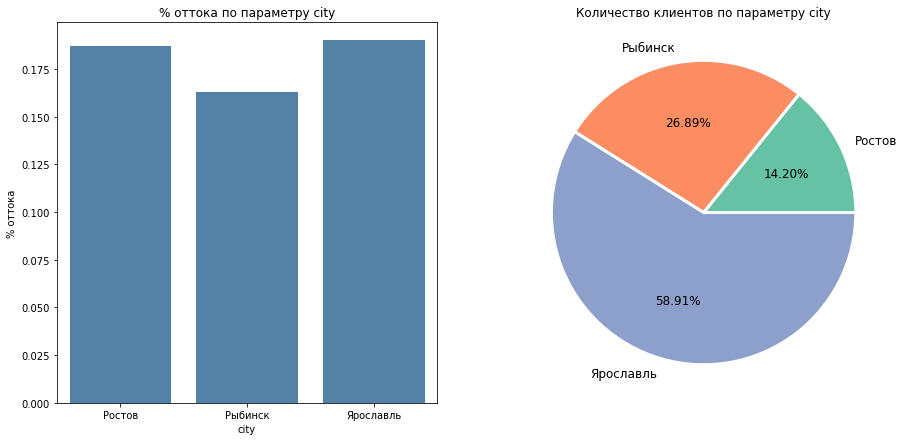

,param,no_churn,churn,count,%_of_churn
0,1,3088,235,3323,0.071
1,2,4141,978,5119,0.191
2,3,741,297,1038,0.286
3,4,174,300,474,0.633
4,5,11,8,19,0.421


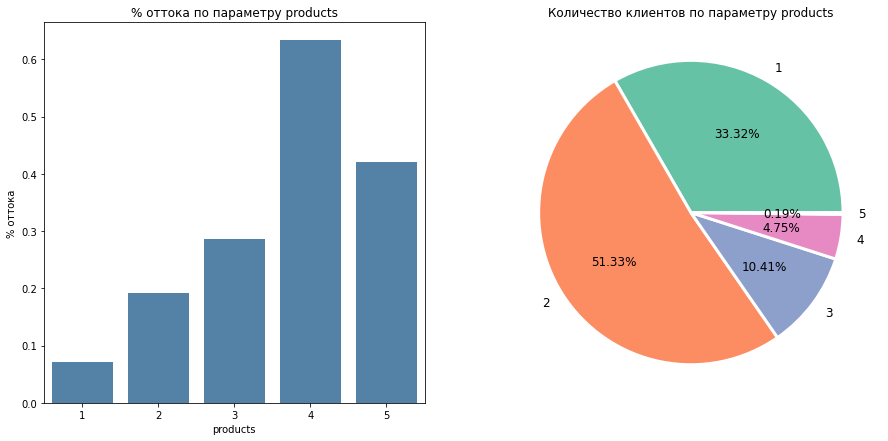

,param,no_churn,churn,count,%_of_churn
0,0,2374,815,3189,0.256
1,1,5781,1003,6784,0.148


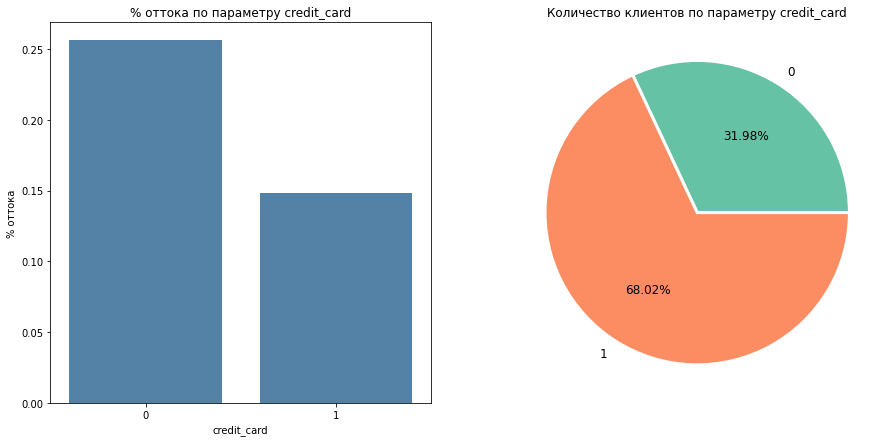

,param,no_churn,churn,count,%_of_churn
0,0,2486,90,2576,0.035
1,1,680,93,773,0.120
2,2,885,166,1051,0.158
3,3,1219,321,1540,0.208
4,4,1383,464,1847,0.251
5,5,1339,576,1915,0.301
6,6,103,58,161,0.360
7,7,43,37,80,0.462
8,8,11,6,17,0.353
9,9,6,7,13,0.538


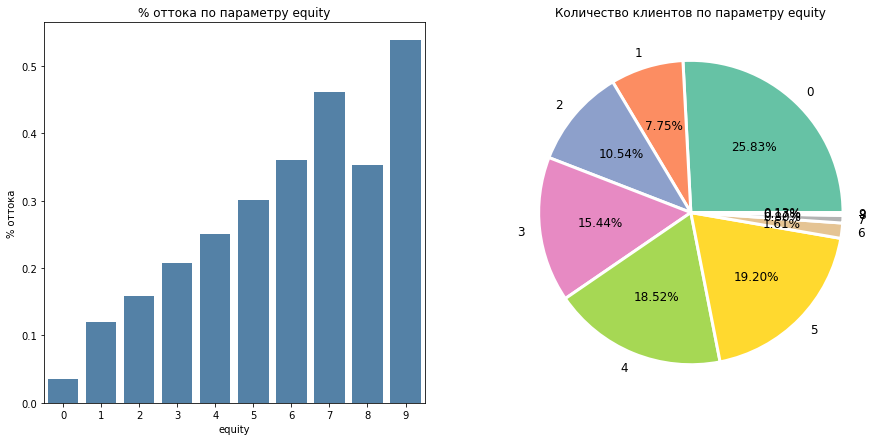

,param,no_churn,churn,count,%_of_churn
0,0,4217,541,4758,0.114
1,1,3938,1277,5215,0.245


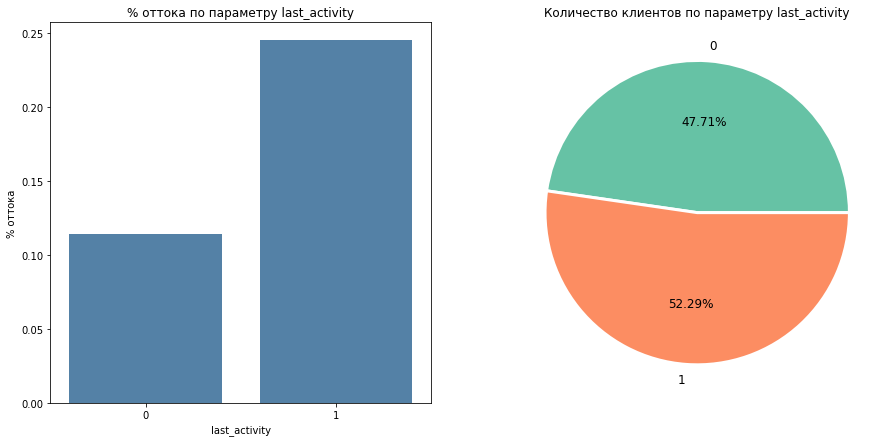

In [ ]:
df = data[['gender', 'age_class', 'city', 'products', 'credit_card', 'equity', 'last_activity', 'churn', 'score']]

def graph(df):
    for col in df.columns[:-2]:

        ratio = df.pivot_table(index=col, columns='churn', values='score', aggfunc='count')
        ratio.reset_index(inplace=True)
        ratio.columns = ['param', 'no_churn', 'churn']
        ratio['count'] = ratio['churn'] + ratio['no_churn']
#         ratio['count'] = ratio['churn'].add(ratio['no_churn'], fill_value=0)
        ratio['%_of_churn'] = round(ratio['churn'] / (ratio['no_churn'] + ratio['churn']), 3)
#         ratio['%_of_churn'] = round(ratio['churn'].div((ratio['no_churn'] + ratio['churn']), fill_value=1), 3)
#         ratio = ratio.sort_values(by='%_of_churn', ascending=False)
        display(ratio)

        fig, ax = plt.subplots(1, 2, figsize=(15, 7))

        sns.barplot(data=ratio,
                    x='param',
                    y='%_of_churn',
                    color='Steelblue',
                    ax=ax[0])
        ax[0].set(title=(f'% оттока по параметру {col}'),
                  xlabel=(f'{col}'),
                  ylabel='% оттока')


        values = ratio['count']
        labels = list(df[col].unique())


        ax[1].pie(ratio['count'],
                  labels=list(ratio['param']),
                   textprops={'size' : 12},
                   wedgeprops={'linewidth' : 3, 'edgecolor' : 'white'},
                   autopct='%.2f%%',
                   colors=sns.color_palette('Set2'))
        ax[1].set_title(f'Количество клиентов по параметру {col}')

        plt.show()

        print()
        print()

graph(df)

**Вывод**

- Количество клиентов по гендеру почти одинаковое, но отток больше у мужчин.
- Наибольшее количество клиентов представлено в группе "взрослые" (от 35 до 50 лет). Самый большой отток наблюдается у клиентов в возрасте от 18 до 34 лет, гипотеза в данном случае подтверждается (молодые чаще склонны к поиску личной выгоды, стабильность для них не так важна). Меньше всего у взрослых.
- Наибольшее количество клиентов проживает в Ярославле, в этом же городе наблюдается самый большой отток среди других городов.
- Больше всего клиентов с 2-мя продуктами, отток имеет самое большое значение у клиентов с 4-я продуктами (единственный случай, когда ушедшие клиенты превышают оставшихся).
- Клиентов банка с кредитной картой в данных представлено в 2 раза больше, отток превалирует у тех, кто не пользуется кредиткой.
- С оценкой собственности "0" больше всего клиетов. Если рассматривать объективно churn rate, то он наибольший у клиентов с оценкой собственности "6", у "7" и "9" недостаточно данных для принятия корректного решения.
- Количество активных и не активных клиентов за последний месяц почти одинаковое (активных на 2% больше). Отток больше также у активных.

### Распределение оттока клиентов

In [ ]:
data['age'] = data['age'].astype('int')

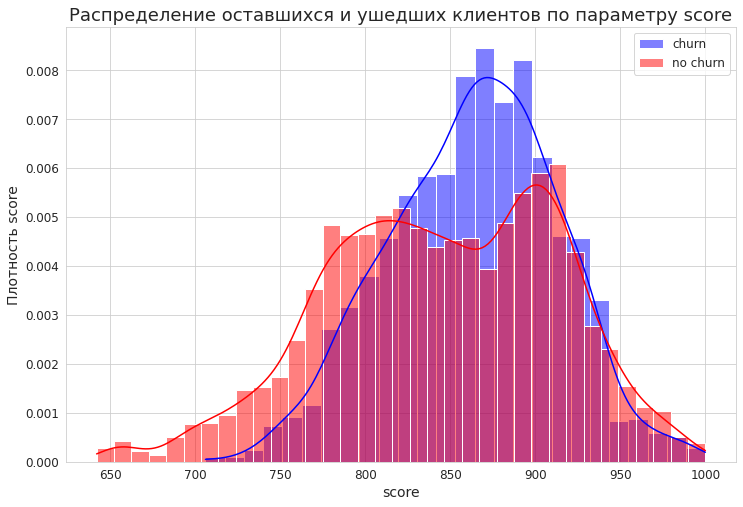

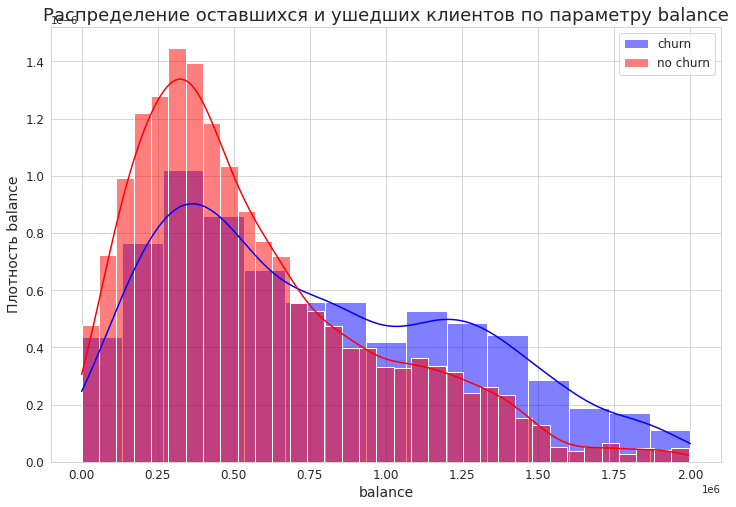

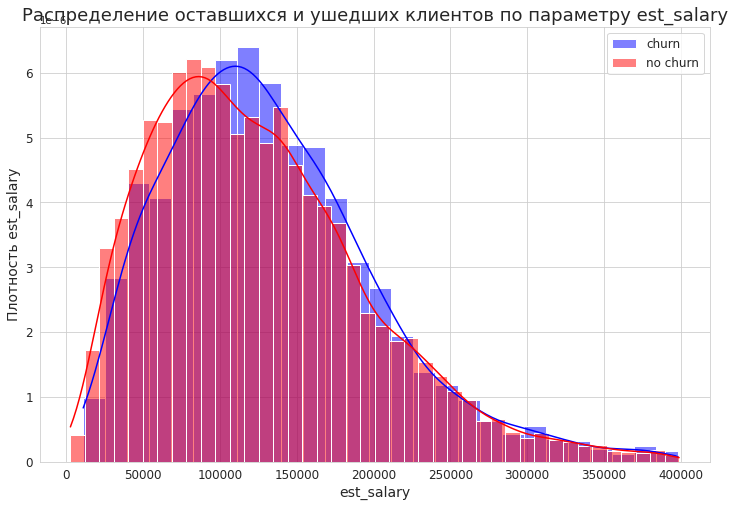

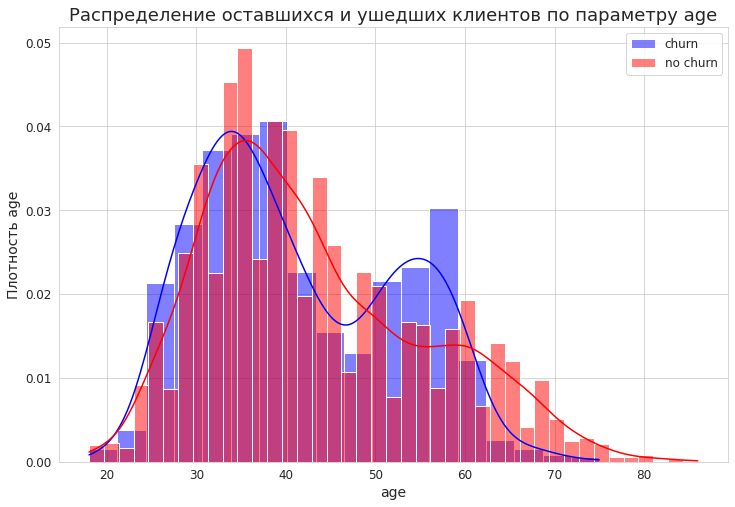

In [ ]:
# для непрерывных показателей строим распределения с деление по параметру churn

for i in ['score', 'balance', 'est_salary', 'age']:

    if i == 'balance':
        tmp = data[data['balance'] <= 2000000]
    elif i == 'est_salary':
        tmp = data[data['est_salary'] <= 400000]
    else:
        tmp = data


    sns.set_style('whitegrid')

    plt.figure(figsize=(12, 8))

    sns.histplot(tmp[tmp['churn'] == 1][i],
                 color="blue",
                    kde=True,
                     stat="density",
                     label="churn",
                     common_norm=False)

    sns.histplot(tmp[tmp['churn'] == 0][i],
                     color="red",
                     kde=True,
                     stat="density",
                     label="no churn",
                     common_norm=False)

    plt.title(f'Распределение оставшихся и ушедших клиентов по параметру {i}', size=18)
    plt.xlabel(f'{i}', size=14)
    plt.ylabel(f'Плотность {i}', size=14)
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.legend(prop={'size': 12})

    plt.show()

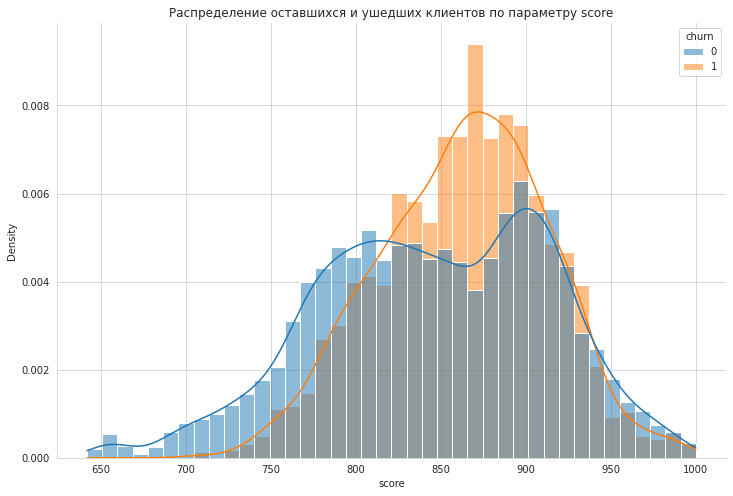

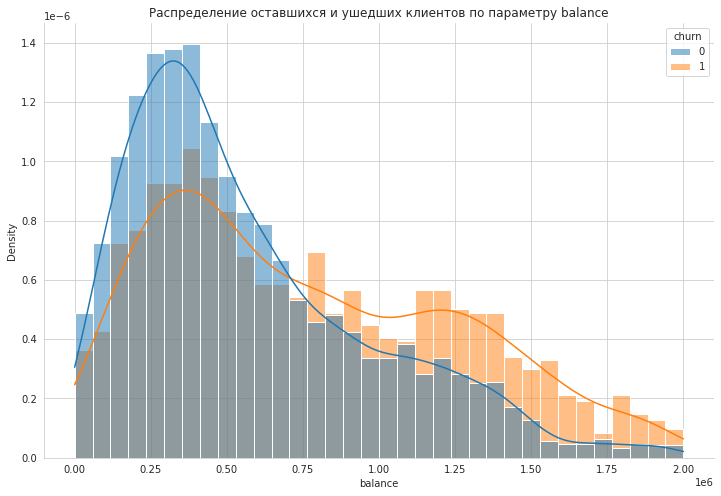

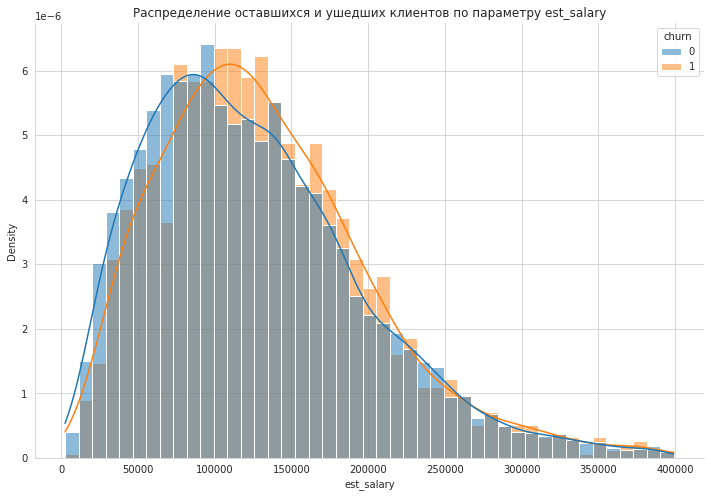

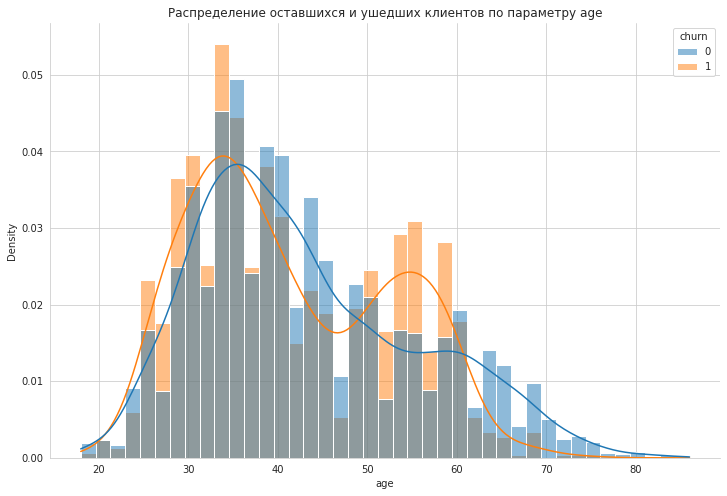

In [ ]:
for i in ['score', 'balance', 'est_salary', 'age']:

    if i == 'balance':
        tmp = data[data['balance'] <= 2000000]
    elif i == 'est_salary':
        tmp = data[data['est_salary'] <= 400000]
    else:
        tmp = data


    sns.set_style('whitegrid')

    fig, ax = plt.subplots( figsize=(12, 8))

    sns.despine(left=False, ax=ax)

    sns.histplot(data=tmp,
                 x=i,
                 hue='churn',
                 common_norm=False,
                 stat='density',
                 kde=True,
                 ax=ax)
    ax.grid(True)
    ax.set_title(f'Распределение оставшихся и ушедших клиентов по параметру {i}')

    plt.show()

**Вывод**

- Клиенты с рейтингом ближе к 810 меньше уходят, чем клиенты с рейтингом 880
- Основная часть клиентов уходят, у которых на балансе от 200 000 до 700 000. Остаются клиенты тоже из этого диапазона, но больше
- По зарплате клиенты распределены нормально с правым хвостом в обоих случаях. Основная часть клиентов приходится на диапазон от 40 000 до 165 000
- Возраст ушедших клиентов в основном составляет от 25 до 38 и 55-58 лет. Оставшиеся - от 30 до 45 с сильным проседом на 33-35 годах

**Вывод по анализу**

- Больше половины клиентов имеют достаточно высокий кредитный рейтинг
- Основной диапазон возраста клиентов - 35-50 лет
- Медианный баланс на картах клиентов составляет 500 000 и зарплата - 100 000
- Наибольший отток происходит у клиентов с 4-я продуктами, проживающими в Ярославле или Рыбинске
- По гендерному признаку отток происходит чуть больше у мужчин, особенно с 4-я продуктами
- Самый большой отток наблюдается у клиентов в возрасте от 18 до 34 лет
- Наибольшее количество клиентов проживает в Ярославле, в этом же городе наблюдается самый большой отток среди других городов
- Больше всего клиентов с 2-мя продуктами
- Клиентов банка с кредитной картой в данных представлено в 2 раза больше, отток превалирует у тех, кто не пользуется кредиткой
- С оценкой собственности "0" больше всего клиетов
- Количество активных и не активных клиентов почти одинаковое. Отток больше также у активных
- Клиенты с рейтингом ближе к 810 меньше уходят, чем клиенты с рейтингом 880
- Основная часть клиентов уходят, у которых на балансе от 200 000 до 700 000. Остаются клиенты тоже из этого диапазона, но больше
- По зарплате клиенты распределены нормально с правым хвостом в обоих случаях. Основная часть клиентов приходится на диапазон от 40 000 до 165 000
- Возраст ушедших клиентов в основном составляет от 25 до 38 и 55-58 лет. Оставшиеся - от 30 до 45 с сильным проседом на 33-35 годах

## Сегментирование клиентов

### Количество клиентов по сегментам

,products,cnt_clients
0,1,3323
1,2,5119
2,3,1038
3,4,474
4,5,19


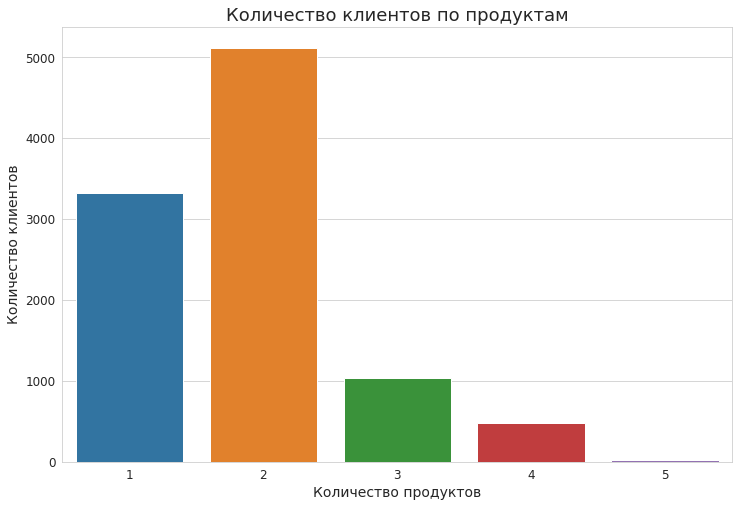

In [ ]:
segments_of_clients = data.pivot_table(index='products', values='user_id', aggfunc='count')
segments_of_clients.reset_index(inplace=True)
segments_of_clients.columns = ['products', 'cnt_clients']
display(segments_of_clients)

plt.figure(figsize=(12, 8))

sns.barplot(data=segments_of_clients,
            x='products',
            y='cnt_clients')

plt.title('Количество клиентов по продуктам', size=18)
plt.xlabel('Количество продуктов', size=14)
plt.ylabel('Количество клиентов', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

**Вывод**

Больше всего клиентов с 2-я продуктами, меньше всего с 4-я. Клиентов с 5-ю продуктами рассматривать не будет, поскольку их очень мало.

### Распределение сегментов по параметрам

gender,Ж,М
products,,
1,1527,1796
2,2676,2443
3,591,447
4,179,295


churn
gender products          
Ж      1         0.041912
       2         0.127803
       3         0.213198
       4         0.558659
М      1         0.095212
       2         0.260336
       3         0.382550
       4         0.677966

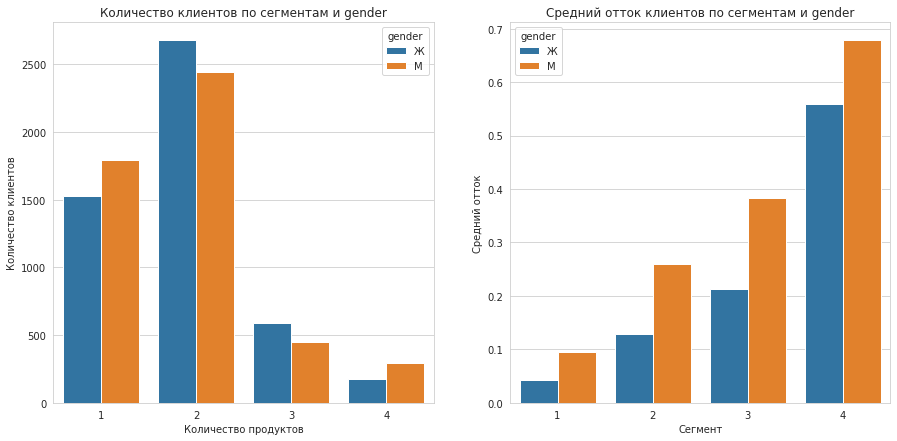

credit_card,0,1
products,,
1,453,2870
2,1916,3203
3,669,369
4,151,323


churn
credit_card products          
0           1         0.050773
            2         0.275052
            3         0.300448
            4         0.423841
1           1         0.073868
            2         0.140805
            3         0.260163
            4         0.730650

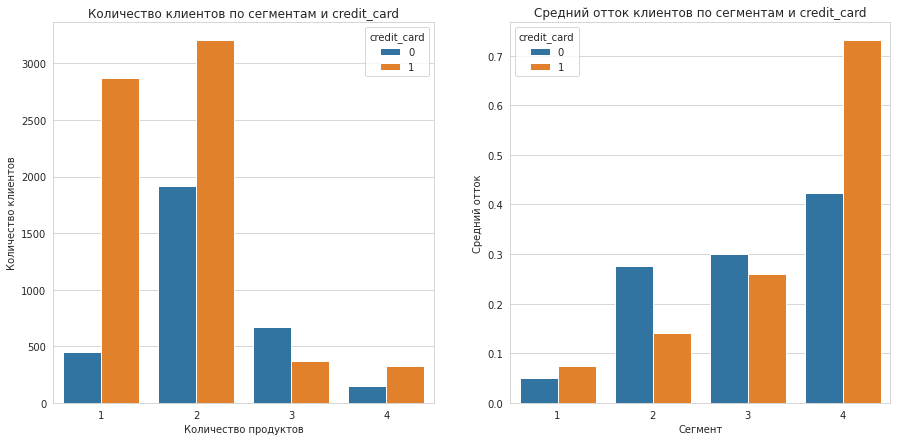

city,Ростов,Рыбинск,Ярославль
products,,,
1,444,857,2022
2,805,1560,2754
3,95,165,778
4,68,99,307


churn
city      products          
Ростов    1         0.110360
          2         0.188820
          3         0.284211
          4         0.544118
Рыбинск   1         0.065344
          2         0.179487
          3         0.212121
          4         0.646465
Ярославль 1         0.064293
          2         0.198257
          3         0.302057
          4         0.648208

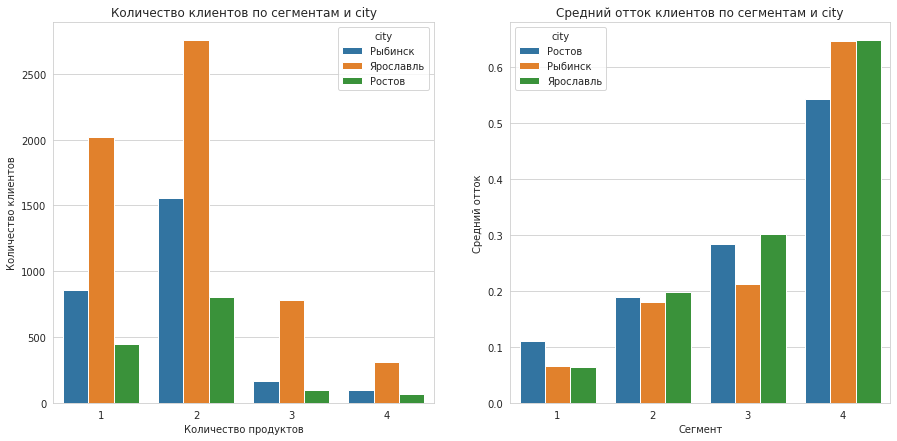

age_class,Взрослые,Молодые,Пожилые
products,,,
1,1564,984,775
2,2218,1520,1381
3,435,232,371
4,234,159,81


churn
age_class products          
Взрослые  1         0.058184
          2         0.156898
          3         0.239080
          4         0.641026
Молодые   1         0.083333
          2         0.240789
          3         0.344828
          4         0.572327
Пожилые   1         0.080000
          2         0.191166
          3         0.304582
          4         0.728395

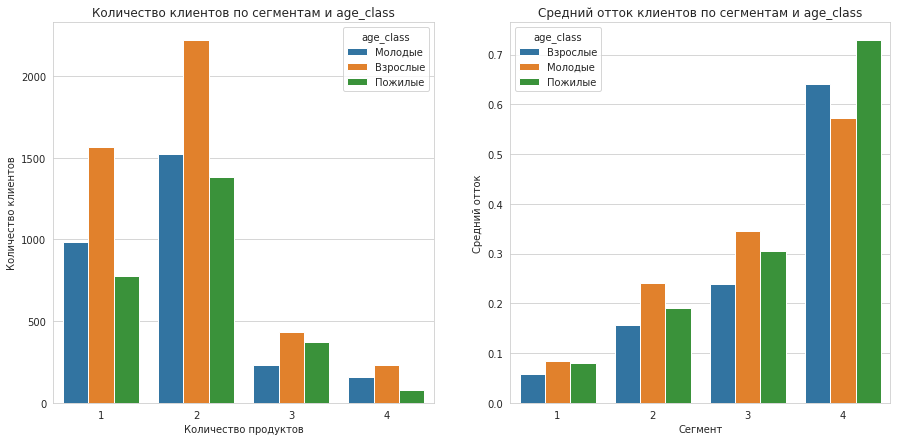

In [ ]:
def graph(df):

    for col in ['gender', 'credit_card', 'city', 'age_class']:

        cnt_clients = df.pivot_table(index='products', columns=col, values='churn', aggfunc='count')
        display(cnt_clients)


        ratio = df.pivot_table(index=[col, 'products'], values='churn', aggfunc='mean')
        display(ratio)
        ratio.reset_index(inplace=True)


        fig, ax = plt.subplots(1, 2, figsize=(15, 7))

        sns.countplot(data=df,
                      x='products',
                      hue=col,
                      ax=ax[0])
        ax[0].set(title=(f'Количество клиентов по сегментам и {col}'),
                  xlabel='Количество продуктов',
                  ylabel='Количество клиентов')


        sns.barplot(data=ratio,
                    x='products',
                    y='churn',
                    hue=col,
                    ax=ax[1])
        ax[1].set(title=(f'Средний отток клиентов по сегментам и {col}'),
                  xlabel='Сегмент',
                  ylabel='Средний отток')


        plt.show()


graph(data.query('products < 5'))

### Распределение сегментов по непрерывным параметрам

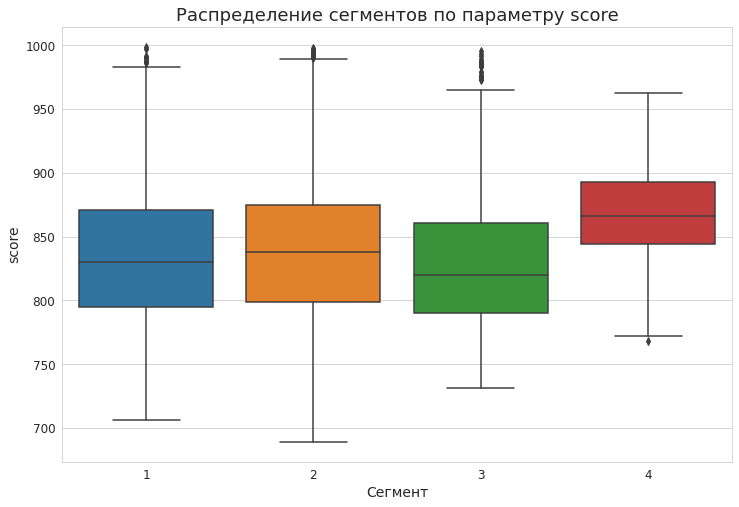

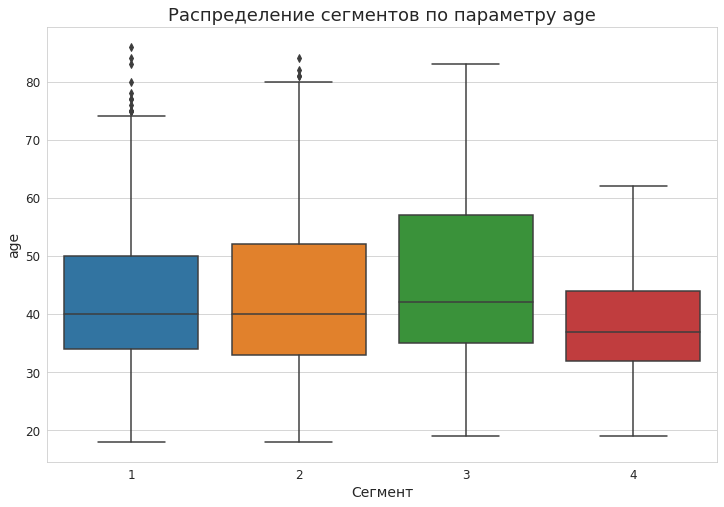

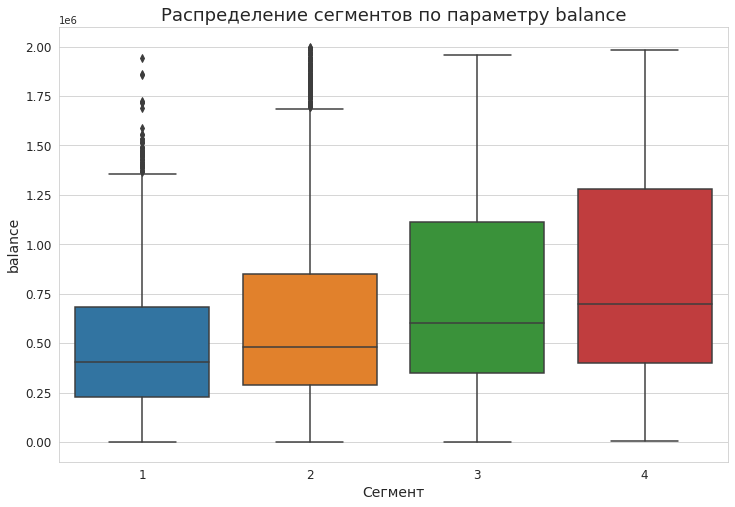

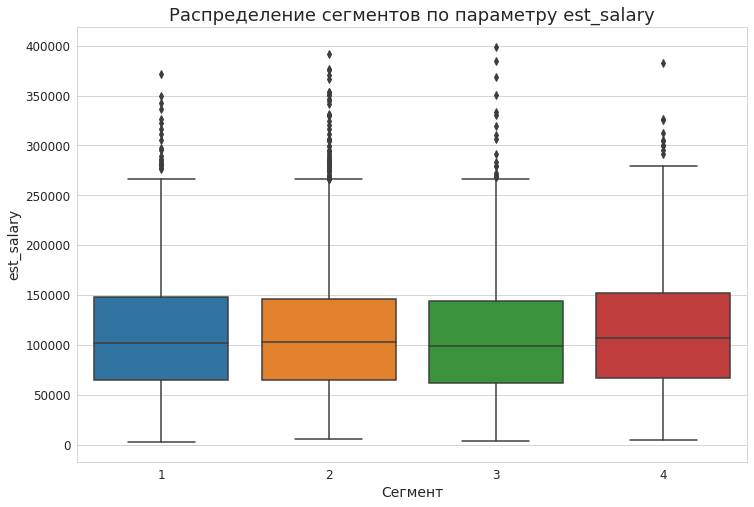

In [ ]:
for col in ['score', 'age', 'balance', 'est_salary']:

    plt.figure(figsize=(12, 8))

    sns.boxplot(data=data[(data['products'] < 5) & (data['balance'] <= 2000000) & (data['est_salary'] <= 400000)], x='products', y=col)

    plt.title(f'Распределение сегментов по параметру {col}', size=18)
    plt.xlabel('Сегмент', size=14)
    plt.ylabel(f'{col}', size=14)
    plt.xticks(size=12)
    plt.yticks(size=12)

    plt.show()

In [ ]:
f_1_product = data["products"] == 1
f_is_activity = data["last_activity"] == 1
f_balance_upper_churn = data["balance"] > 1e6
f_score_upper_churn = (data["score"] > 825) & (data["score"] < 900)
f_age_upper_churn = (data['age'] > 50) & (data['age'] < 60)
f_credit_card = data['credit_card'] == 0
f_gender = data['gender'] == 'М'
f_city = data['city'] == 'Ярославль'
f_age = data['age_class'] == 'Молодые'

list_of_filters = [f_is_activity, f_balance_upper_churn, f_score_upper_churn, f_age_upper_churn, f_credit_card, f_gender, f_city, f_age]

In [ ]:
for pair in combinations(list_of_filters, 1):

  f1 = pair[0]

  tmp = data.loc[f_1_product & f1, "churn"]
  churn_value = tmp.mean()
  print(f"Filter: {f1.name}, churn: {churn_value:.3f}, Size: {tmp.shape[0]}")

Filter: last_activity, churn: 0.088, Size: 1753
Filter: balance, churn: 0.178, Size: 197
Filter: score, churn: 0.120, Size: 1000
Filter: age, churn: 0.108, Size: 409
Filter: credit_card, churn: 0.051, Size: 453
Filter: gender, churn: 0.095, Size: 1796
Filter: city, churn: 0.064, Size: 2022
Filter: age_class, churn: 0.083, Size: 984


In [ ]:
for pair in combinations(list_of_filters, 2):

  f1 = pair[0]
  f2 = pair[1]

  tmp = data.loc[f_1_product & f1 & f2, "churn"]
  churn_value = tmp.mean()
  print(f"Filter: {f1.name}, {f2.name}, churn: {churn_value:.3f} Size: {tmp.shape[0]}")

Filter: last_activity, balance, churn: 0.283 Size: 99
Filter: last_activity, score, churn: 0.178 Size: 484
Filter: last_activity, age, churn: 0.106 Size: 207
Filter: last_activity, credit_card, churn: 0.047 Size: 256
Filter: last_activity, gender, churn: 0.115 Size: 951
Filter: last_activity, city, churn: 0.086 Size: 1029
Filter: last_activity, age_class, churn: 0.118 Size: 535
Filter: balance, score, churn: 0.200 Size: 80
Filter: balance, age, churn: 0.212 Size: 33
Filter: balance, credit_card, churn: 0.222 Size: 9
Filter: balance, gender, churn: 0.250 Size: 112
Filter: balance, city, churn: 0.202 Size: 104
Filter: balance, age_class, churn: 0.296 Size: 27
Filter: score, age, churn: 0.183 Size: 120
Filter: score, credit_card, churn: 0.058 Size: 171
Filter: score, gender, churn: 0.157 Size: 529
Filter: score, city, churn: 0.110 Size: 562
Filter: score, age_class, churn: 0.159 Size: 308
Filter: age, credit_card, churn: 0.080 Size: 87
Filter: age, gender, churn: 0.136 Size: 177
Filter: a

In [ ]:
f_1_product = data["products"] == 2
f_is_activity = data["last_activity"] == 1
f_balance_upper_churn = data["balance"] > 1e6
f_score_upper_churn = (data["score"] > 825) & (data["score"] < 900)
f_age_upper_churn = (data['age'] > 50) & (data['age'] < 60)
f_credit_card = data['credit_card'] == 0
f_gender = data['gender'] == 'М'
f_city = data['city'] == 'Ярославль'
f_age = data['age_class'] == 'Молодые'

list_of_filters = [f_is_activity, f_balance_upper_churn, f_score_upper_churn, f_age_upper_churn, f_credit_card, f_gender, f_city, f_age]

In [ ]:
for pair in combinations(list_of_filters, 1):

  f1 = pair[0]

  tmp = data.loc[f_1_product & f1, "churn"]
  churn_value = tmp.mean()
  print(f"Filter: {f1.name}, churn: {churn_value:.3f}, Size: {tmp.shape[0]}")

Filter: last_activity, churn: 0.277, Size: 2639
Filter: balance, churn: 0.333, Size: 1078
Filter: score, churn: 0.261, Size: 2176
Filter: age, churn: 0.289, Size: 767
Filter: credit_card, churn: 0.275, Size: 1916
Filter: gender, churn: 0.260, Size: 2443
Filter: city, churn: 0.198, Size: 2754
Filter: age_class, churn: 0.241, Size: 1520


In [ ]:
for pair in combinations(list_of_filters, 2):

  f1 = pair[0]
  f2 = pair[1]

  tmp = data.loc[f_1_product & f1 & f2, "churn"]
  churn_value = tmp.mean()
  print(f"Filter: {f1.name}, {f2.name}, churn: {churn_value:.3f} Size: {tmp.shape[0]}")

Filter: last_activity, balance, churn: 0.493 Size: 570
Filter: last_activity, score, churn: 0.429 Size: 1054
Filter: last_activity, age, churn: 0.393 Size: 394
Filter: last_activity, credit_card, churn: 0.397 Size: 1050
Filter: last_activity, gender, churn: 0.360 Size: 1212
Filter: last_activity, city, churn: 0.300 Size: 1329
Filter: last_activity, age_class, churn: 0.371 Size: 840
Filter: balance, score, churn: 0.409 Size: 443
Filter: balance, age, churn: 0.432 Size: 213
Filter: balance, credit_card, churn: 0.435 Size: 570
Filter: balance, gender, churn: 0.439 Size: 565
Filter: balance, city, churn: 0.343 Size: 612
Filter: balance, age_class, churn: 0.521 Size: 188
Filter: score, age, churn: 0.379 Size: 330
Filter: score, credit_card, churn: 0.361 Size: 889
Filter: score, gender, churn: 0.341 Size: 986
Filter: score, city, churn: 0.287 Size: 1151
Filter: score, age_class, churn: 0.324 Size: 655
Filter: age, credit_card, churn: 0.388 Size: 343
Filter: age, gender, churn: 0.357 Size: 32

1 продукт + кредитный рейтинг, отток 12%, размер 1000

1 продукт + активность + кредитный рейтинг, отток 18%, размер 484

1 продукт + кредитный рейтинг + гендер, отток 16%, размер 529

1 продукт + кредитный рейтинг + возрастная категория, отток 16%, размер 308

2 продукт + баланс, отток 33%, размер 1078

2 продукт + возраст, отток 29%, размер 767

2 продукт + активность + баланс, отток 49%, размер 570

2 продукт + активность + кредитный рейтинг, отток 43%, размер 1054

2 продукт + активность + баланс, отток 49%, размер 570

2 продукт + активность + возрастная категория, отток 37%, размер 840

**Характеристики клиента каждого сегмента**

**`1 сегмент`**
- от 33 до 51 года
- Используют только кредитную карту в данном банке
- Зарплата - 63 000-137 000
- Баланс - 250 000-650 000
- Кредитный рейтинг - 790-870

**`2 сегмент`**
- от 33 до 52 лет
- Больше половины используют кредитку
- Зарплата - 63 000-137 000
- Баланс - 300 000-800 000
- Кредитный рейтинг - 800-875

**`3 сегмент`**
- от 35 до 59 года
- Чуть больше половины не используют кредитку
- Зарплата - 60 000-135 000
- Баланс - 350 000-1 150 000
- Кредитный рейтинг - 780-860

**`4 сегмент`**
- от 31 до 46 года
- Больше прловины используют кредитку
- Зарплата - 67 000-140 000
- Баланс - 400 000-1 250 000
- Кредитный рейтинг - 845-890

**Сегменты**

По % уходов сегметы расположены в порядке возрастания: от 1 к 4, от меньшего к большему

**`1 сегмент`**

- Отток клиентов составляет 7%
- Является самым менее отточным сегментом  
- Клиенты, которые уходят чаще являются молодые/пожилые мужчины с кредитными картами из Ростова

**`2 сегмент`**

- Отток - 19%
- У данного сегмента под отток в основном попадают молодые мужчины без кредитных карт

**`3 сегмент`**

- Уходят 29% клиентов
- Под отток попадают молодые/пожилые мужчины из Ярославля и Ростова

**`4 сегмент`**

- 63% клиентов попадают под отток
- Имеет самый большой % оттока. Уходят взрослые/пожилые мужчины с кредитными картами из Ярославля и Рыбинска

**Схожие сегменты**

**`1 и 2 сегменты`**

Имеют схожие распределения по кредитному рейтингу, возрасту и заработной плате. В основном клиенты в возрасте от 34 до 50 лет с кредитными картами.

Отток во 2-ом сегменте у клиентов без кредитной карте в сумме больше, чем отток по кредиткам в 1-ом сегменте и 2-ом с кредитками.


**`2 и 3 сегменты`**

Похожи тем, что имеют одинаковые тенденции по оттоку клиентов.

Имеют одинаковые тенденции оттока по параметрам кредитной карты и возрастным категориям.

**Однородные группы клиентов**

**`1 продукт:`** кредитный рейтинг от 825 до 900, отток 12%, размер 1000

**`1 продукт:`** активные клиенты с рейтингом от 825 до 900, отток 18%, размер 484

**`1 продукт:`** мужчины с кредитным рейтингом от 825 до 900, отток 16%, размер 529

**`1 продукт:`** мужчины в возрасте от 18 до 34 с рейтингом от 825 до 900, отток 16%, размер 308

**`2 продукт:`** клиенты с балансом более миллиона, отток 33%, размер 1078

**`2 продукт:`** подгруппа с возрастом от 50 до 60 лет, отток 29%, размер 767

**`2 продукт:`** активные клиенты с рейтингом от 825 до 900, отток 43%, размер 1054

**`2 продукт:`** активные клиенты в возрасте от 18 до 34 лет, отток 37%, размер 840

**Вывод**
- Больше всего клиентов с 2-я продуктами, меньше всего с 4-я
- Внутри каждого сегмента уходят больше всего в 4-м
- 1 и 2 сегменты очень похожи по распределениям
- Между балансом и количеством продуктов есть прямая зависимость

## Проверка гипотез

### Одинаково ли получают клиенты из 1 и 2 сегментов

`H0`: средние зарплаты клиентов 1 и 2 сегментов равны

`H1`: средние зарплаты клиентов 1 и 2 сегментов не равны

In [ ]:
seg_1 = data[data['products'] == 1]['est_salary']
seg_2 = data[data['products'] == 2]['est_salary']

def x(sample):
    Q1 = np.percentile(sample, 25)
    Q3 = np.percentile(sample, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_sample = [x for x in sample if x >= lower_bound and x <= upper_bound]
    return np.array(cleaned_sample)

seg_1 = x(seg_1)
seg_2 = x(seg_2)

stat1, p1 = shapiro(seg_1)
stat2, p2 = shapiro(seg_2)

if p1 > 0.05 and p2 > 0.05:
    print('Обе выборки распределены нормально')
else:
    print('Обе выборки не распределены нормально')

results = st.ttest_ind(seg_1, seg_2, equal_var=False)

alpha = 0.05

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

**Вывод**

Нулевая гипотеза отвергнута, средние зарплаты 1 и 2 сегментов не равны.

Согласно ЦПТ распределение выборочного среднего стремится к нормальному распределению, что является одним из требований для проведения ttest.

### Совпадает ли отток клиентов 2 и 3 сегментов

`H0`: средний отток клиентов 2 и 3 сегментов равны

`H1`: средний отток клиентов 2 и 3 сегментов не равны

In [ ]:
seg_2 = data[data['products'] == 2]['churn']
seg_3 = data[data['products'] == 3]['churn']

alpha = 0.05

observed = np.array([[np.sum((seg_2 == 0) & (seg_2 == 0)), np.sum((seg_2 == 0) & (seg_2 == 1))],
                     [np.sum((seg_3 == 1) & (seg_3 == 0)), np.sum((seg_3 == 1) & (seg_3 == 1))]])

print(observed)
chi2, p, dof, expected = chi2_contingency(observed)

print(f'p-value: {p}')
print(f'Chi-square test statistic: {chi2}')

if p < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

**Вывод**

Нулевая гипотеза отвергнута, средний отток клиентов 2 и 3 сегментов не равен. Используем тест Хи-квадрат для сравнения 2-х бинарных выборок.

# Общий вывод

Задачей проекта было сегментирование клиентов и анализ их оттока.

**Этапы проекта**

1. Выгрузка данных
 - Выгрузка
 - Просмотр общей информации
 - Проверка распределений


2. Предобработка данных
 - Удалили аномалие
 - Проверили дубликаты
 - Добавили столбцы
 - Изменили типы данных
 - Удалили пропуски


3. Анализ данных
 - Распределение численных показателей
 - Отток клиентов по продуктам
 - Доля оттока клиентов по признакам
 - Распределение оттока клиентов


4. Сегментирование клиентов
 - Количество клиентов по сегментам
 - Распределение сегментов по параметрам
 - Распределение сегментов по непрерывным параметрам


5. Проверка гипотез

**Характеристики клиента каждого сегмента**

**`1 сегмент`**
- от 33 до 51 года
- Используют только кредитную карту в данном банке
- Зарплата - 63 000-137 000
- Баланс - 250 000-650 000
- Кредитный рейтинг - 790-870

**`2 сегмент`**
- от 33 до 52 лет
- Больше половины используют кредитку
- Зарплата - 63 000-137 000
- Баланс - 300 000-800 000
- Кредитный рейтинг - 800-875

**`3 сегмент`**
- от 35 до 59 года
- Чуть больше половины не используют кредитку
- Зарплата - 60 000-135 000
- Баланс - 350 000-1 150 000
- Кредитный рейтинг - 780-860

**`4 сегмент`**
- от 31 до 46 года
- Больше прловины используют кредитку
- Зарплата - 67 000-140 000
- Баланс - 400 000-1 250 000
- Кредитный рейтинг - 845-890

**Сегменты**

По % уходов сегметы расположены в порядке возрастания: от 1 к 4, от меньшего к большему

**`1 сегмент`**

- Отток клиентов составляет 7%
- Является самым менее отточным сегментом  
- Клиенты, которые уходят чаще являются молодые/пожилые мужчины с кредитными картами из Ростова

**`2 сегмент`**

- Отток - 19%
- У данного сегмента под отток в основном попадают молодые мужчины без кредитных карт

**`3 сегмент`**

- Уходят 29% клиентов
- Под отток попадают молодые/пожилые мужчины из Ярославля и Ростова

**`4 сегмент`**

- 63% клиентов попадают под отток
- Имеет самый большой % оттока. Уходят взрослые/пожилые мужчины с кредитными картами из Ярославля и Рыбинска

**Однородные группы клиентов**

**`1 продукт:`** кредитный рейтинг от 825 до 900, отток 12%, размер 1000

**`1 продукт:`** активные клиенты с рейтингом от 825 до 900, отток 18%, размер 484

**`1 продукт:`** мужчины с кредитным рейтингом от 825 до 900, отток 16%, размер 529

**`1 продукт:`** мужчины в возрасте от 18 до 34 с рейтингом от 825 до 900, отток 16%, размер 308

**`2 продукт:`** клиенты с балансом более миллиона, отток 33%, размер 1078

**`2 продукт:`** подгруппа с возрастом от 50 до 60 лет, отток 29%, размер 767

**`2 продукт:`** активные клиенты с рейтингом от 825 до 900, отток 43%, размер 1054

**`2 продукт:`** активные клиенты в возрасте от 18 до 34 лет, отток 37%, размер 840

**В результате исследования были сделаны следующие выводы**

- **`Больше половины`** клиентов имеют достаточно **`высокий кредитный рейтинг`**
- Основной диапазон **`возраста`** клиентов - **`35-50 лет`**
- Медианный **`баланс`** на картах клиентов составляет **`500 000`** и **`зарплата - 100 000`**
- **`Наибольший отток`** происходит у клиентов с **`4-я продуктами`**, проживающими **`в Ярославле или Рыбинске`**
- По гендерному признаку **`отток`** происходит чуть **`больше у мужчин`**
- **`Самый большой отток`** наблюдается у клиентов в возрасте **`от 18 до 34 лет`**
- **`Наибольшее количество`** клиентов проживает **`в Ярославле`**, в этом же городе наблюдается самый большой отток среди других городов
- **`Больше`** всего клиентов **`с 2-мя продуктами`**
- Клиентов банка **`с кредитной картой`** в данных представлено **`в 2 раза больше`**, **`отток превалирует у тех, кто не пользуется кредиткой`**
- С оценкой **`собственности "0" больше всего`** клиетов
- Количество активных и не активных клиентов почти одинаковое. **`Отток больше`** также **`у активных`**
- Клиенты **`с рейтингом 810 меньше уходят, чем клиенты с рейтингом 880`**
- Основная часть клиентов **`уходят, у которых на балансе от 200 000 до 700 000`**. Остаются клиенты тоже из этого диапазона, но больше
- По **`зарплате`** клиенты распределены нормально с правым хвостом в обоих случаях. Основная часть клиентов приходится на диапазон **`от 40 000 до 165 000`**
- **`Возраст ушедших`** клиентов в основном составляет **`от 25 до 38 и 55-58 лет`**. Оставшиеся - от 30 до 45 с сильным проседом на 33-35 годах
- Внутри каждого сегмента **`уходят больше всего в 4-м`**
- **`1 и 2 сегменты`** очень **`похожи по распределениям`**
- Между балансом и количеством продуктов есть прямая зависимость

**Гипотезы**

`Гипотеза 1`

Формулировка: Одинаково ли получают клиенты из 1 и 2 сегментов.

*Результат:* Нулевая гипотеза отвергнута, средние зарплаты 1 и 2 сегментов не равны.

`Гипотеза 2`

Формулировка: Совпадает ли отток клиентов 2 и 3 сегментов.

*Результат:* Нулевая гипотеза отвергнута, средний отток клиентов 2 и 3 сегментов не равен.

**Рекомендации**

Для удержания молодых клиентов (от 18 до 34) можно сделать специальные условия по кредитам и ипотеке, поскольку в этом диапазоне чаще всего приобретают недвижимость семьи.

Уменьшить отток клиентов можно путём увеличения клиентов с кредитными картами. В данном случае нужно будет увеличить кредитный лимит и/или пересмотреть условия скоринга.

Обладателям большого количества собственности так же можно улучшить кредитные условия.

*По сегментам*

**`1 сегмент`**

Этому сегменту можно предложить дебетовые карты


**`2 сегмент`**

Увеличить долю кредитных карт.


**`3 сегмент`**

 - Данному сегменту можно предлагать кредитные карты, поскольку количество клиентов в нём с кредитнами меньше и отток тоже меньше, если есть она
 - Из-за большого количества людей старше 50 лет, можно предлагать какие-нибудь пенсионные продукты
 - Также будет выгодно предложить данному сегменту банковские вклады

**`4 сегмент`**

В основном молодые люди с высоким кредитным рейтингом, поэтому для данной группы можно предлагать дебетовые карты. И ещё будет уместным предложить инвестиции на бирже.

**Презентация:** https://disk.yandex.ru/i/k97tRNiXHgTw7A